<a href="https://www.kaggle.com/code/songglodtan/predict-which-passengers-are-transported-python?scriptVersionId=118705189" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/kaggle/input"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Data field descriptions
* **train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
    * **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * **Destination** - The planet the passenger will be debarking to.
    * **Age** - The age of the passenger.
    * **VIP** - Whether the passenger has paid for special VIP service during the voyage.
    * **RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * **Name** - The first and last names of the passenger.
    * **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

* **test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. *Your task is to predict the value of Transported for the passengers in this set*.
sample_submission.csv - A submission file in the correct format.
    * **PassengerId** - Id for each passenger in the test set.
    * **Transported** - The target. For each passenger, predict either True or False.

# Import datasets
there are 2 datasets
* train.csv
* test.csv

In [2]:
train_path = "/kaggle/input/spaceship-titanic/train.csv"
test_path = "/kaggle/input/spaceship-titanic/test.csv"

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# Inspect the data :)

## Overview of the train dataset

In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
df_train.isna().sum()[df_train.isna().sum() > 0]

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64

In [7]:
df_train.duplicated().sum()

0

In [8]:
df_train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

## Overview of the test dataset

In [9]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [11]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [12]:
df_test.isna().sum()[df_test.isna().sum() > 0]

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [13]:
df_test.duplicated().sum()

0

## Extract Cabin column
Cabin column can split into three columns (deck/num/side)

In [14]:
def split_cabin(df):
    # Replace NA values with outliers in Cabin column
    df["Cabin"].fillna("Z/9999/Z", inplace = True)
    
    cols = ["CabinDeck", "CabinNum", "CabinSide"]
    df[cols] = df["Cabin"].str.split("/", expand = True)
    df.drop(["CabinNum"], axis = 1, inplace = True)
    
    # Fill NA value back in (I will fill these later)
    df.loc[df["CabinDeck"] == "Z", "CabinDeck"] = np.nan
    df.loc[df["CabinSide"] == "Z", "CabinSide"] = np.nan
    
    # Drop it
    df.drop(["Cabin"], axis = 1, inplace = True)

In [15]:
split_cabin(df_train)
split_cabin(df_test)

In [16]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinSide
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
 13  CabinDeck     8494 non-null   object 
 14  CabinSide     8494 non-null   object 
dtypes: bool(1), float64(6), object(8)
memory usage: 959.4+ KB


# EDA & Visualization

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.concat([df_train, df_test], ignore_index = True)

In [20]:
data.groupby("Destination").size()

Destination
55 Cancri e      2641
PSO J318.5-22    1184
TRAPPIST-1e      8871
dtype: int64

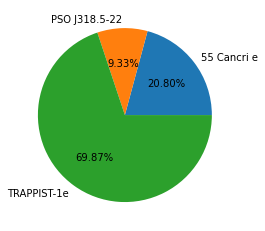

In [21]:
plt.pie(
    data = data.groupby("Destination").size().reset_index(name = "Count"),
    x = "Count",
    labels = "Destination",
    autopct = "%.2f%%"
)
plt.show()

In [22]:
data.groupby(["Destination", "HomePlanet"]).size().unstack()

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,984,1310,294
PSO J318.5-22,1065,29,67
TRAPPIST-1e,4672,1737,2256


<AxesSubplot:xlabel='Age', ylabel='HomePlanet'>

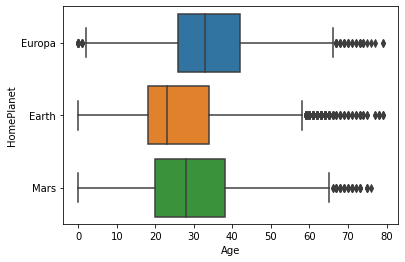

In [23]:
sns.boxplot(
    data = data,
    x = "Age",
    y = "HomePlanet"
)

<AxesSubplot:xlabel='Age', ylabel='Count'>

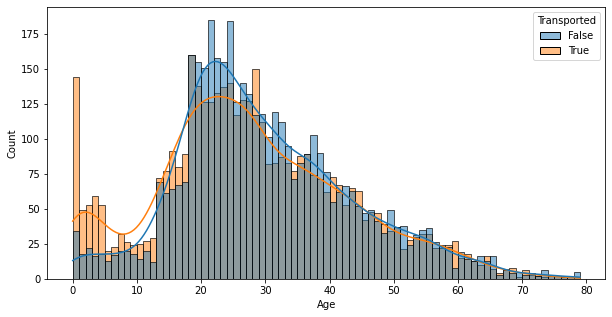

In [24]:
plt.figure(figsize = (10, 5))
sns.histplot(
    data = df_train,
    x = "Age",
    hue = "Transported",
    kde = True,
    binwidth = 1
)

<AxesSubplot:xlabel='Age', ylabel='Count'>

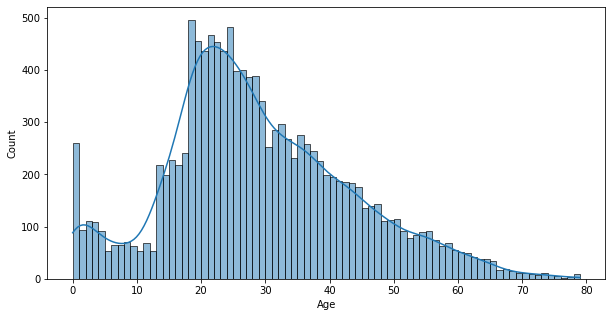

In [25]:
plt.figure(figsize = (10, 5))
sns.histplot(
    data = data,
    x = "Age",
    kde = True,
    binwidth = 1
)

In [26]:
for planet in ["Europa", "Earth", "Mars"]:
    age_median = data.loc[data["HomePlanet"] == planet, "Age"].median()
    print("The age of people from", planet, "is around", age_median)

The age of people from Europa is around 33.0
The age of people from Earth is around 23.0
The age of people from Mars is around 28.0


In [27]:
# For further use
age_median = {
    "Europa": 33,
    "Earth": 23,
    "Mars": 28
}

<AxesSubplot:xlabel='VIP', ylabel='count'>

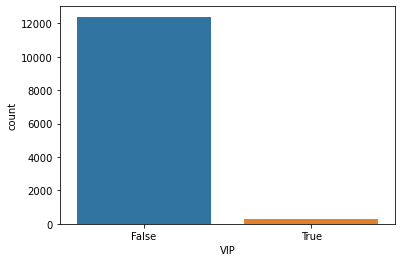

In [28]:
sns.countplot(
    data = data,
    x = "VIP"
)

<AxesSubplot:xlabel='VIP', ylabel='count'>

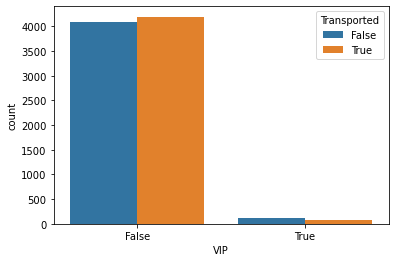

In [29]:
sns.countplot(
    data = data,
    x = "VIP",
    hue = "Transported"
)

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

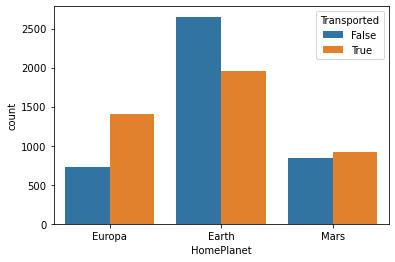

In [30]:
sns.countplot(
    data = data,
    x = "HomePlanet",
    hue = "Transported"
)

<AxesSubplot:xlabel='CryoSleep', ylabel='count'>

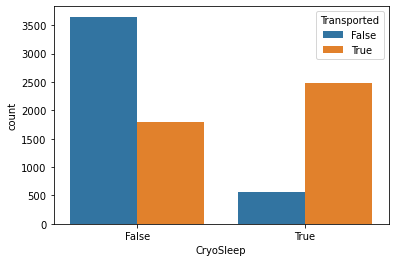

In [31]:
sns.countplot(
    data = data,
    x = "CryoSleep",
    hue = "Transported"
)

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

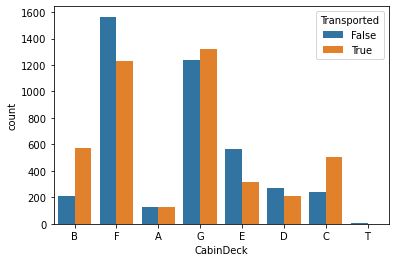

In [32]:
sns.countplot(
    data = data,
    x = "CabinDeck",
    hue = "Transported"
)

In [33]:
data.groupby("CabinDeck").size()

CabinDeck
A     354
B    1141
C    1102
D     720
E    1323
F    4239
G    3781
T      11
dtype: int64

In [34]:
data.groupby(["CabinDeck", "HomePlanet"]).size().unstack().fillna(0)

HomePlanet,Earth,Europa,Mars
CabinDeck,,,
A,0.0,346.0,0.0
B,0.0,1124.0,0.0
C,0.0,1081.0,0.0
D,0.0,296.0,406.0
E,583.0,197.0,508.0
F,2426.0,0.0,1713.0
G,3700.0,0.0,0.0
T,0.0,10.0,0.0


In [35]:
data.groupby(["HomePlanet", "CabinDeck", "Destination"]).size().unstack().fillna(0)

Destination           55 Cancri e  PSO J318.5-22  TRAPPIST-1e
HomePlanet CabinDeck                                         
Earth      E                 66.0           42.0        455.0
           F                374.0          320.0       1681.0
           G                523.0          680.0       2426.0
Europa     A                152.0            2.0        187.0
           B                499.0            5.0        597.0
           C                455.0           20.0        585.0
           D                 99.0            0.0        195.0
           E                 65.0            0.0        126.0
           T                  2.0            0.0          8.0
Mars       D                 70.0           16.0        308.0
           E                 30.0           15.0        454.0
           F                191.0           34.0       1444.0

In [36]:
data.groupby(["CabinSide", "HomePlanet"]).size().unstack()

HomePlanet,Earth,Europa,Mars
CabinSide,,,
P,3382,1450,1330
S,3327,1604,1297


In [37]:
data.groupby(["CabinDeck", "CabinSide", "HomePlanet"]).size().unstack().fillna(0)

HomePlanet            Earth  Europa   Mars
CabinDeck CabinSide                       
A         P             0.0   161.0    0.0
          S             0.0   185.0    0.0
B         P             0.0   505.0    0.0
          S             0.0   619.0    0.0
C         P             0.0   528.0    0.0
          S             0.0   553.0    0.0
D         P             0.0   153.0  205.0
          S             0.0   143.0  201.0
E         P           287.0    99.0  242.0
          S           296.0    98.0  266.0
F         P          1247.0     0.0  883.0
          S          1179.0     0.0  830.0
G         P          1848.0     0.0    0.0
          S          1852.0     0.0    0.0
T         P             0.0     4.0    0.0
          S             0.0     6.0    0.0

<AxesSubplot:xlabel='CabinSide', ylabel='count'>

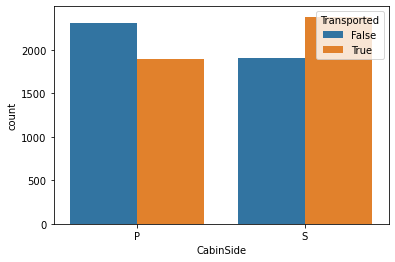

In [38]:
sns.countplot(
    data = data,
    x = "CabinSide",
    hue = "Transported"
)

In [39]:
data.groupby("CabinSide").size()

CabinSide
P    6290
S    6381
dtype: int64

<AxesSubplot:>

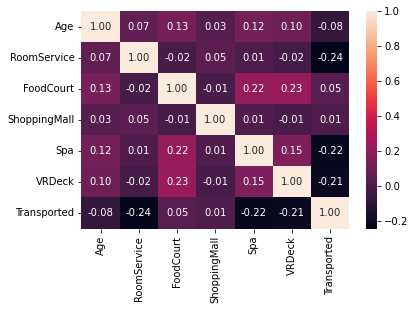

In [40]:
sns.heatmap(
    data = df_train.corr(), 
    annot = True, 
    fmt = ".2f"
)

# Handle missing values
There are two options here
1. **Deletion** (drop missing values)
2. **Imputation** (replace missing values)

However, I usually use the imputation method.

*References*
* [Simple techniques for missing data imputation](https://www.kaggle.com/code/residentmario/simple-techniques-for-missing-data-imputation/notebook)
* [Handling Missing Values - Data Science](https://medium.com/mlearning-ai/handling-missing-values-data-science-7b8e302264ee)

## CryoSleep column
I notice that if CryoSleep is true, then all the values of RoomService, FoodCourt, ShoppingMall, Spa, and VRDeck columns will be equal to 0. This means that if one of those columns has a value > 0, then CryoSleep is false.

In [41]:
print("train: missing values in CryoSleep column is", df_train.isna().sum()["CryoSleep"])
print("test: missing values in CryoSleep column is", df_test.isna().sum()["CryoSleep"])

train: missing values in CryoSleep column is 217
test: missing values in CryoSleep column is 93


In [42]:
df_train[df_train["CryoSleep"] == True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0


In [43]:
df_train[df_train["CryoSleep"] == False].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,5343.000000,5328.000000,5329.000000,5335.000000,5326.000000,5320.000000
mean,29.651319,350.146772,713.004316,270.586504,486.092940,475.716165
std,14.075540,803.080320,1970.547985,741.756155,1396.233751,1404.174304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,3.000000,5.000000,2.000000,7.000000,4.000000
75%,38.000000,390.250000,537.000000,242.000000,354.750000,356.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [44]:
def update_amount_bill(df):
    cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    df.loc[df["CryoSleep"] == True, cols] = 0

In [45]:
def update_cryo_sleep(df):
    cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    df.loc[
        (df[cols[0]] == 0) & 
        (df[cols[1]] == 0) & 
        (df[cols[2]] == 0) & 
        (df[cols[3]] == 0) & 
        (df[cols[4]] == 0),
        "CryoSleep"
    ] = True
    df.loc[
        (df[cols[0]] > 0) | 
        (df[cols[1]] > 0) | 
        (df[cols[2]] > 0) | 
        (df[cols[3]] > 0) | 
        (df[cols[4]] > 0),
        "CryoSleep"
    ] = False

In [46]:
update_amount_bill(df_train)
update_amount_bill(df_test)

In [47]:
update_cryo_sleep(df_train)
update_cryo_sleep(df_test)

In [48]:
print("train: missing values in CryoSleep column is", df_train.isna().sum()["CryoSleep"])
print("test: missing values in CryoSleep column is", df_test.isna().sum()["CryoSleep"])

train: missing values in CryoSleep column is 11
test: missing values in CryoSleep column is 2


In [49]:
from sklearn.impute import SimpleImputer

STRATEGY_NUMERIC = "median"
exp_cols = ["FoodCourt", "ShoppingMall", "Spa", "VRDeck", "RoomService"]

In [50]:
def impute_missing_data(df, cols, strategy):
    imputer = SimpleImputer(strategy = strategy)
    imputer.fit(df_train[cols])
    df[cols] = imputer.transform(df[cols])

In [51]:
impute_missing_data(df_train, exp_cols, STRATEGY_NUMERIC)
impute_missing_data(df_test, exp_cols, STRATEGY_NUMERIC)

In [52]:
update_cryo_sleep(df_train)
update_cryo_sleep(df_test)

In [53]:
print("train: missing values in CryoSleep column is", df_train.isna().sum()["CryoSleep"])
print("test: missing values in CryoSleep column is", df_test.isna().sum()["CryoSleep"])

train: missing values in CryoSleep column is 0
test: missing values in CryoSleep column is 0


## HomePlanet column
According to EDA
* Earth
    * E, F, and G
    * Cabin desk G is 100% people from Earth
* Europa
    * A, B, C, D, E, and T
    * Cabin desk A, B, C, and T are 100% people from Europa
    * Most of the people are at cabin desk B
* Mars
    * D, E, and F
    * All of these cabin desks have people from multiple planets
    * Most of the people are at cabin desk F

In [54]:
print("train: missing values in HomePlanet column is", df_train.isna().sum()["HomePlanet"])
print("test: missing values in HomePlanet column is", df_test.isna().sum()["HomePlanet"])

train: missing values in HomePlanet column is 201
test: missing values in HomePlanet column is 87


In [55]:
def fill_europa_planet(df):
    cabin_desks = ["A", "B", "C", "T"]
    df.loc[(df["HomePlanet"].isna()) & (df["CabinDeck"].isin(cabin_desks)), "HomePlanet"] = "Europa"

def fill_earth_planet(df):
    cabin_desk = "G"
    df.loc[(df["HomePlanet"].isna()) & (df["CabinDeck"] == cabin_desk), "HomePlanet"] = "Earth"
    
def fill_mars_planet(df):
    cabin_desks = ["D", "E", "F"]
    df.loc[(df["HomePlanet"].isna()) & (df["CabinDeck"].isin(cabin_desks)), "HomePlanet"] = "Mars"

In [56]:
fill_europa_planet(df_train)
fill_europa_planet(df_test)

In [57]:
fill_earth_planet(df_train)
fill_earth_planet(df_test)

In [58]:
fill_mars_planet(df_train)
fill_mars_planet(df_test)

In [59]:
print("train: missing values in HomePlanet column is", df_train.isna().sum()["HomePlanet"])
print("test: missing values in HomePlanet column is", df_test.isna().sum()["HomePlanet"])

train: missing values in HomePlanet column is 6
test: missing values in HomePlanet column is 1


Let's check and handle other missing values.

In [60]:
df_train.loc[df_train["HomePlanet"].isna(), ["HomePlanet", "Age", "Destination", "CabinDeck", "CabinSide"]]

,HomePlanet,Age,Destination,CabinDeck,CabinSide
1550,NaN,18.0,55 Cancri e,NaN,NaN
1714,NaN,67.0,TRAPPIST-1e,NaN,NaN
2227,NaN,11.0,TRAPPIST-1e,NaN,NaN
3858,NaN,40.0,TRAPPIST-1e,NaN,NaN
6267,NaN,64.0,TRAPPIST-1e,NaN,NaN
7293,NaN,21.0,55 Cancri e,NaN,NaN


In [61]:
df_train.loc[
    (df_train["HomePlanet"].isna()) & (df_train["Destination"] == "TRAPPIST-1e"), 
    "HomePlanet"
] = "Earth"

In [62]:
# Most people from Europa are going to 55 Cancri e
df_train.loc[
    (df_train["HomePlanet"].isna()) & (df_train["Destination"] == "55 Cancri e"), 
    "HomePlanet"
] = "Europa"

In [63]:
df_test.loc[df_test["HomePlanet"].isna(), ["HomePlanet", "Age", "Destination", "CabinDeck", "CabinSide"]]

,HomePlanet,Age,Destination,CabinDeck,CabinSide
3421,NaN,24.0,TRAPPIST-1e,NaN,NaN


In [64]:
df_test.loc[
    (df_test["HomePlanet"].isna()) & (df_test["Destination"] == "TRAPPIST-1e"), 
    "HomePlanet"
] = "Earth"

In [65]:
print("train: missing values in HomePlanet column is", df_train.isna().sum()["HomePlanet"])
print("test: missing values in HomePlanet column is", df_test.isna().sum()["HomePlanet"])

train: missing values in HomePlanet column is 0
test: missing values in HomePlanet column is 0


## Age column

In [66]:
print("train: missing values in Age column is", df_train.isna().sum()["Age"])
print("test: missing values in Age column is", df_test.isna().sum()["Age"])

train: missing values in Age column is 179
test: missing values in Age column is 91


In [67]:
def impute_age(df, home_planet):
    temp = df["HomePlanet"] == home_planet
    df.loc[df["Age"].isna() & temp, "Age"] = age_median[home_planet]

In [68]:
for planet in ["Earth", "Europa", "Mars"]:
    impute_age(df_train, planet)
    impute_age(df_test, planet)

In [69]:
print("train: missing values in Age column is", df_train.isna().sum()["Age"])
print("test: missing values in Age column is", df_test.isna().sum()["Age"])

train: missing values in Age column is 0
test: missing values in Age column is 0


## Destination column
According to EDA, both test and train datasets indicated that most people are going to **TRAPPIST-1e**.

In [70]:
print("train: missing values in Destination column is", df_train.isna().sum()["Destination"])
print("test: missing values in Destination column is", df_test.isna().sum()["Destination"])

train: missing values in Destination column is 182
test: missing values in Destination column is 92


In [71]:
df_train["Destination"].fillna("TRAPPIST-1e", inplace = True)
df_test["Destination"].fillna("TRAPPIST-1e", inplace = True)

In [72]:
print("train: missing values in Destination column is", df_train.isna().sum()["Destination"])
print("test: missing values in Destination column is", df_test.isna().sum()["Destination"])

train: missing values in Destination column is 0
test: missing values in Destination column is 0


## VIP column
To prevent [overfitting](https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms), I will drop this column.

In [73]:
df_train.drop(["VIP"], axis = 1, inplace = True)
df_test.drop(["VIP"], axis = 1, inplace = True)

## Name column
It might be important to keep a "name" in some cases or datasets. But for this dataset, I will drop this column. However, it is optional. **You might be able to get more interesting insights if you extract first and last names!**

In [74]:
df_train.drop(["Name"], axis = 1, inplace = True)
df_test.drop(["Name"], axis = 1, inplace = True)

## CabinDeck column
According to EDA, I will use most people on the cabin deck to impute the NA values.
* Earth - G
* Europa - B
* Mars - F

In [75]:
print("train: missing values in CabinDeck column is", df_train.isna().sum()["CabinDeck"])
print("test: missing values in CabinDeck column is", df_test.isna().sum()["CabinDeck"])

train: missing values in CabinDeck column is 199
test: missing values in CabinDeck column is 100


In [76]:
df_train.loc[(df_train["CabinDeck"].isna()) & (df_train["HomePlanet"] == "Earth"), "CabinDeck"] = "G"
df_test.loc[(df_test["CabinDeck"].isna()) & (df_test["HomePlanet"] == "Earth"), "CabinDeck"] = "G"

In [77]:
df_train.loc[(df_train["CabinDeck"].isna()) & (df_train["HomePlanet"] == "Mars"), "CabinDeck"] = "F"
df_test.loc[(df_test["CabinDeck"].isna()) & (df_test["HomePlanet"] == "Mars"), "CabinDeck"] = "F"

In [78]:
df_train.loc[(df_train["CabinDeck"].isna()) & (df_train["HomePlanet"] == "Europa"), "CabinDeck"] = "B"
df_test.loc[(df_test["CabinDeck"].isna()) & (df_test["HomePlanet"] == "Europa"), "CabinDeck"] = "B"

In [79]:
print("train: missing values in CabinDeck column is", df_train.isna().sum()["CabinDeck"])
print("test: missing values in CabinDeck column is", df_test.isna().sum()["CabinDeck"])

train: missing values in CabinDeck column is 0
test: missing values in CabinDeck column is 0


## CabinSide column
According to EDA, I will use most people on the cabin side to impute the NA values.
* Earth - P
* Europa - S
* Mars - P

In [80]:
print("train: missing values in CabinSide column is", df_train.isna().sum()["CabinSide"])
print("test: missing values in CabinSide column is", df_test.isna().sum()["CabinSide"])

train: missing values in CabinSide column is 199
test: missing values in CabinSide column is 100


In [81]:
df_train.loc[
    (df_train["CabinSide"].isna()) & (df_train["HomePlanet"].isin(["Earth", "Mars"])), 
    "CabinSide"
] = "P"
df_test.loc[
    (df_test["CabinSide"].isna()) & (df_test["HomePlanet"].isin(["Earth", "Mars"])), 
    "CabinSide"
] = "P"

In [82]:
df_train.loc[(df_train["CabinSide"].isna()) & (df_train["HomePlanet"] == "Europa"), "CabinSide"] = "S"
df_test.loc[(df_test["CabinSide"].isna()) & (df_test["HomePlanet"] == "Europa"), "CabinSide"] = "S"

In [83]:
print("train: missing values in CabinSide column is", df_train.isna().sum()["CabinSide"])
print("test: missing values in CabinSide column is", df_test.isna().sum()["CabinSide"])

train: missing values in CabinSide column is 0
test: missing values in CabinSide column is 0


## Conclusion
I finally cleared all NA values!

In [84]:
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
CabinDeck       0
CabinSide       0
dtype: int64

In [85]:
df_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
CabinDeck       0
CabinSide       0
dtype: int64

# Feature engineering
I want to add more features!

In [86]:
df_train["Expenses"] = df_train[exp_cols].sum(axis = 1)
df_train["NoSpending"] = df_train["CryoSleep"].astype(int)

In [87]:
df_test["Expenses"] = df_test[exp_cols].sum(axis = 1)
df_test["NoSpending"] = df_test["CryoSleep"].astype(int)

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Destination   8693 non-null   object 
 4   Age           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   bool   
 11  CabinDeck     8693 non-null   object 
 12  CabinSide     8693 non-null   object 
 13  Expenses      8693 non-null   float64
 14  NoSpending    8693 non-null   int64  
dtypes: bool(1), float64(7), int64(1), object(6)
memory usage: 959.4+ KB


# Pre-processing

In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [90]:
drop_cols = ["PassengerId"]
TARGET = "Transported"

In [91]:
df_train_class = df_train.copy()
df_test_class = df_test.copy()

In [92]:
X = df_train_class.drop(TARGET, axis = 1)
y = df_train_class[TARGET]

In [93]:
X_test = df_test_class.copy()

In [94]:
X.drop(drop_cols, axis = 1, inplace = True)
X_test.drop(drop_cols, axis = 1, inplace = True)

## Log transform
[**The logarithm transform**](https://towardsdatascience.com/feature-transformation-for-multiple-linear-regression-in-python-8648ddf070b8) is used to reduce skew in distributions.

In [95]:
for col in ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Expenses"]:
    X[col] = np.log(1 + X[col])
    X_test[col] = np.log(1 + X_test[col])

## Encoding and scaling
* Encoding is for categorical data
* Scaling is for numerical data

In [96]:
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ["int64", "float64"]]
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]

In [97]:
numerical_pipe = Pipeline(
    steps = [
        ("scaler", StandardScaler())
    ]
)
categorical_pipe = Pipeline(
    steps = [
        ("ohe", OneHotEncoder(drop = "if_binary", handle_unknown = "ignore", sparse = False))
    ]
)

In [98]:
# Combine preprocessing
ct = ColumnTransformer(
    transformers = [
        ("num", numerical_pipe, numerical_cols), 
        ("cat", categorical_pipe, categorical_cols)
    ], 
    remainder = "passthrough"
)

# Apply preprocessing
X = ct.fit_transform(X)
X_test = ct.transform(X_test)

In [99]:
X.shape

(8693, 24)

# Model selection
This problem is a binary classification problem. So, there are many methods commonly used for [binary classification](https://en.wikipedia.org/wiki/Binary_classification). <br/>
I decided to use some of the methods used for binary classification. <br/>
*You could try more if you want to. Just have fun with it :)*

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

In [101]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [102]:
classifiers = {
    "LogisticRegression": LogisticRegression(random_state = 0),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(random_state = 0, probability = True),
    "RandomForest": RandomForestClassifier(random_state = 0),
    "LGBM": LGBMClassifier(random_state = 0),
    "NaiveBayes": GaussianNB()
}

## Model evaluation

In [103]:
from sklearn.metrics import accuracy_score, make_scorer

In [104]:
accuracy_scorer = make_scorer(accuracy_score)

In [105]:
FOLDS = 10
kfold = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = 0)

In [106]:
scores = []
for name, model in classifiers.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = accuracy_scorer)
    mean = cv_scores.mean()
    std = cv_scores.std()
    scores.append([mean, std])

In [107]:
scores_df = pd.DataFrame(
    scores, 
    index = [name for name in classifiers.keys()], 
    columns = ["Mean Acc", "SD"]
)
scores_df.sort_values(by = "Mean Acc", ascending = False, inplace = True)

In [108]:
scores_df

,Mean Acc,SD
LGBM,0.807562,0.010856
SVC,0.800004,0.015522
RandomForest,0.788986,0.014269
LogisticRegression,0.774202,0.018173
KNN,0.768940,0.013741
NaiveBayes,0.749716,0.024965


In [109]:
top_classifiers = {
    "SVC": SVC(random_state = 0, probability = True),
    "RandomForest": RandomForestClassifier(random_state = 0),
    "LGBM": LGBMClassifier(random_state = 0)
}

In [110]:
preds = np.zeros(len(X_test))
for name, model in top_classifiers.items():
    cv = StratifiedKFold(n_splits = FOLDS, shuffle = True, random_state = 0)
    score = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        # Get training and validation sets
        X_train, X_valid = X[train_idx], X[val_idx]
        y_train, y_valid = y[train_idx], y[val_idx]

        # Train model
        clf = model
        clf.fit(X_train, y_train)

        # Make predictions and measure accuracy
        preds += clf.predict_proba(X_test)[:, 1]
        score += clf.score(X_valid, y_valid)

    # Average accuracy    
    score = score/FOLDS

    # Print accuracy and time
    print('Model:', name)
    print('Average validation accuracy:', np.round(100 * score, 2))
    print('')

Model: SVC
Average validation accuracy: 79.94

Model: RandomForest
Average validation accuracy: 79.18

Model: LGBM
Average validation accuracy: 80.85



In [111]:
preds = preds/(FOLDS * len(top_classifiers))

# Submission

In [112]:
submission = pd.DataFrame({
    "PassengerId": df_test["PassengerId"],
    "Transported": preds.round()
})
submission = submission.replace({0: False, 1: True})
submission.to_csv("submission.csv", index = False)

In [113]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
